# Hydrogen Atom Wavefunctions

## Theoretical Background

The hydrogen atom represents one of the most important exactly solvable problems in quantum mechanics. The wavefunction $\psi_{nlm}(r, \theta, \phi)$ describes the quantum state of the electron in the Coulomb potential of the proton.

### The Schrödinger Equation

The time-independent Schrödinger equation for the hydrogen atom is:

$$\hat{H}\psi = E\psi$$

where the Hamiltonian is:

$$\hat{H} = -\frac{\hbar^2}{2\mu}\nabla^2 - \frac{e^2}{4\pi\epsilon_0 r}$$

Here, $\mu$ is the reduced mass of the electron-proton system, and the second term represents the Coulomb attraction.

### Separation of Variables

In spherical coordinates, the wavefunction separates into radial and angular parts:

$$\psi_{nlm}(r, \theta, \phi) = R_{nl}(r) \cdot Y_l^m(\theta, \phi)$$

where:
- $R_{nl}(r)$ is the radial wavefunction
- $Y_l^m(\theta, \phi)$ are the spherical harmonics

### Quantum Numbers

The hydrogen atom wavefunctions are characterized by three quantum numbers:
- **Principal quantum number** $n = 1, 2, 3, \ldots$ (determines energy)
- **Angular momentum quantum number** $l = 0, 1, \ldots, n-1$
- **Magnetic quantum number** $m = -l, -l+1, \ldots, l-1, l$

### Radial Wavefunctions

The radial wavefunctions are given by:

$$R_{nl}(r) = \sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]^3}} e^{-\rho/2} \rho^l L_{n-l-1}^{2l+1}(\rho)$$

where:
- $\rho = \frac{2r}{na_0}$
- $a_0 = \frac{4\pi\epsilon_0\hbar^2}{\mu e^2} \approx 0.529$ Å is the Bohr radius
- $L_{n-l-1}^{2l+1}(\rho)$ are the associated Laguerre polynomials

### Energy Levels

The energy eigenvalues depend only on $n$:

$$E_n = -\frac{\mu e^4}{32\pi^2\epsilon_0^2\hbar^2} \cdot \frac{1}{n^2} = -\frac{13.6 \text{ eV}}{n^2}$$

### Probability Density

The probability density for finding the electron at position $(r, \theta, \phi)$ is:

$$|\psi_{nlm}|^2 = |R_{nl}(r)|^2 |Y_l^m(\theta, \phi)|^2$$

The radial probability density (probability of finding the electron at distance $r$) is:

$$P(r) = r^2 |R_{nl}(r)|^2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre, sph_harm, factorial
from mpl_toolkits.mplot3d import Axes3D

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 10

# Physical constants (atomic units: a_0 = 1)
a0 = 1  # Bohr radius

## Implementation of Hydrogen Wavefunctions

We implement the radial wavefunction using the associated Laguerre polynomials from SciPy.

In [2]:
def radial_wavefunction(r, n, l):
    """
    Calculate the radial wavefunction R_nl(r) for the hydrogen atom.
    
    Parameters:
    -----------
    r : array_like
        Radial distance in units of Bohr radius
    n : int
        Principal quantum number (n >= 1)
    l : int
        Angular momentum quantum number (0 <= l < n)
    
    Returns:
    --------
    R_nl : array_like
        Radial wavefunction values
    """
    # Dimensionless variable
    rho = 2 * r / (n * a0)
    
    # Normalization constant
    norm = np.sqrt(
        (2 / (n * a0))**3 * 
        factorial(n - l - 1) / 
        (2 * n * factorial(n + l)**3)
    )
    
    # Associated Laguerre polynomial
    L = genlaguerre(n - l - 1, 2 * l + 1)(rho)
    
    # Radial wavefunction
    R_nl = norm * np.exp(-rho / 2) * rho**l * L
    
    return R_nl


def radial_probability_density(r, n, l):
    """
    Calculate the radial probability density P(r) = r^2 |R_nl(r)|^2.
    
    This gives the probability of finding the electron at distance r
    from the nucleus (integrated over all angles).
    """
    R = radial_wavefunction(r, n, l)
    return r**2 * np.abs(R)**2

## Visualization of Radial Wavefunctions and Probability Densities

We now visualize the radial wavefunctions $R_{nl}(r)$ and radial probability densities $P(r) = r^2|R_{nl}(r)|^2$ for various quantum states.

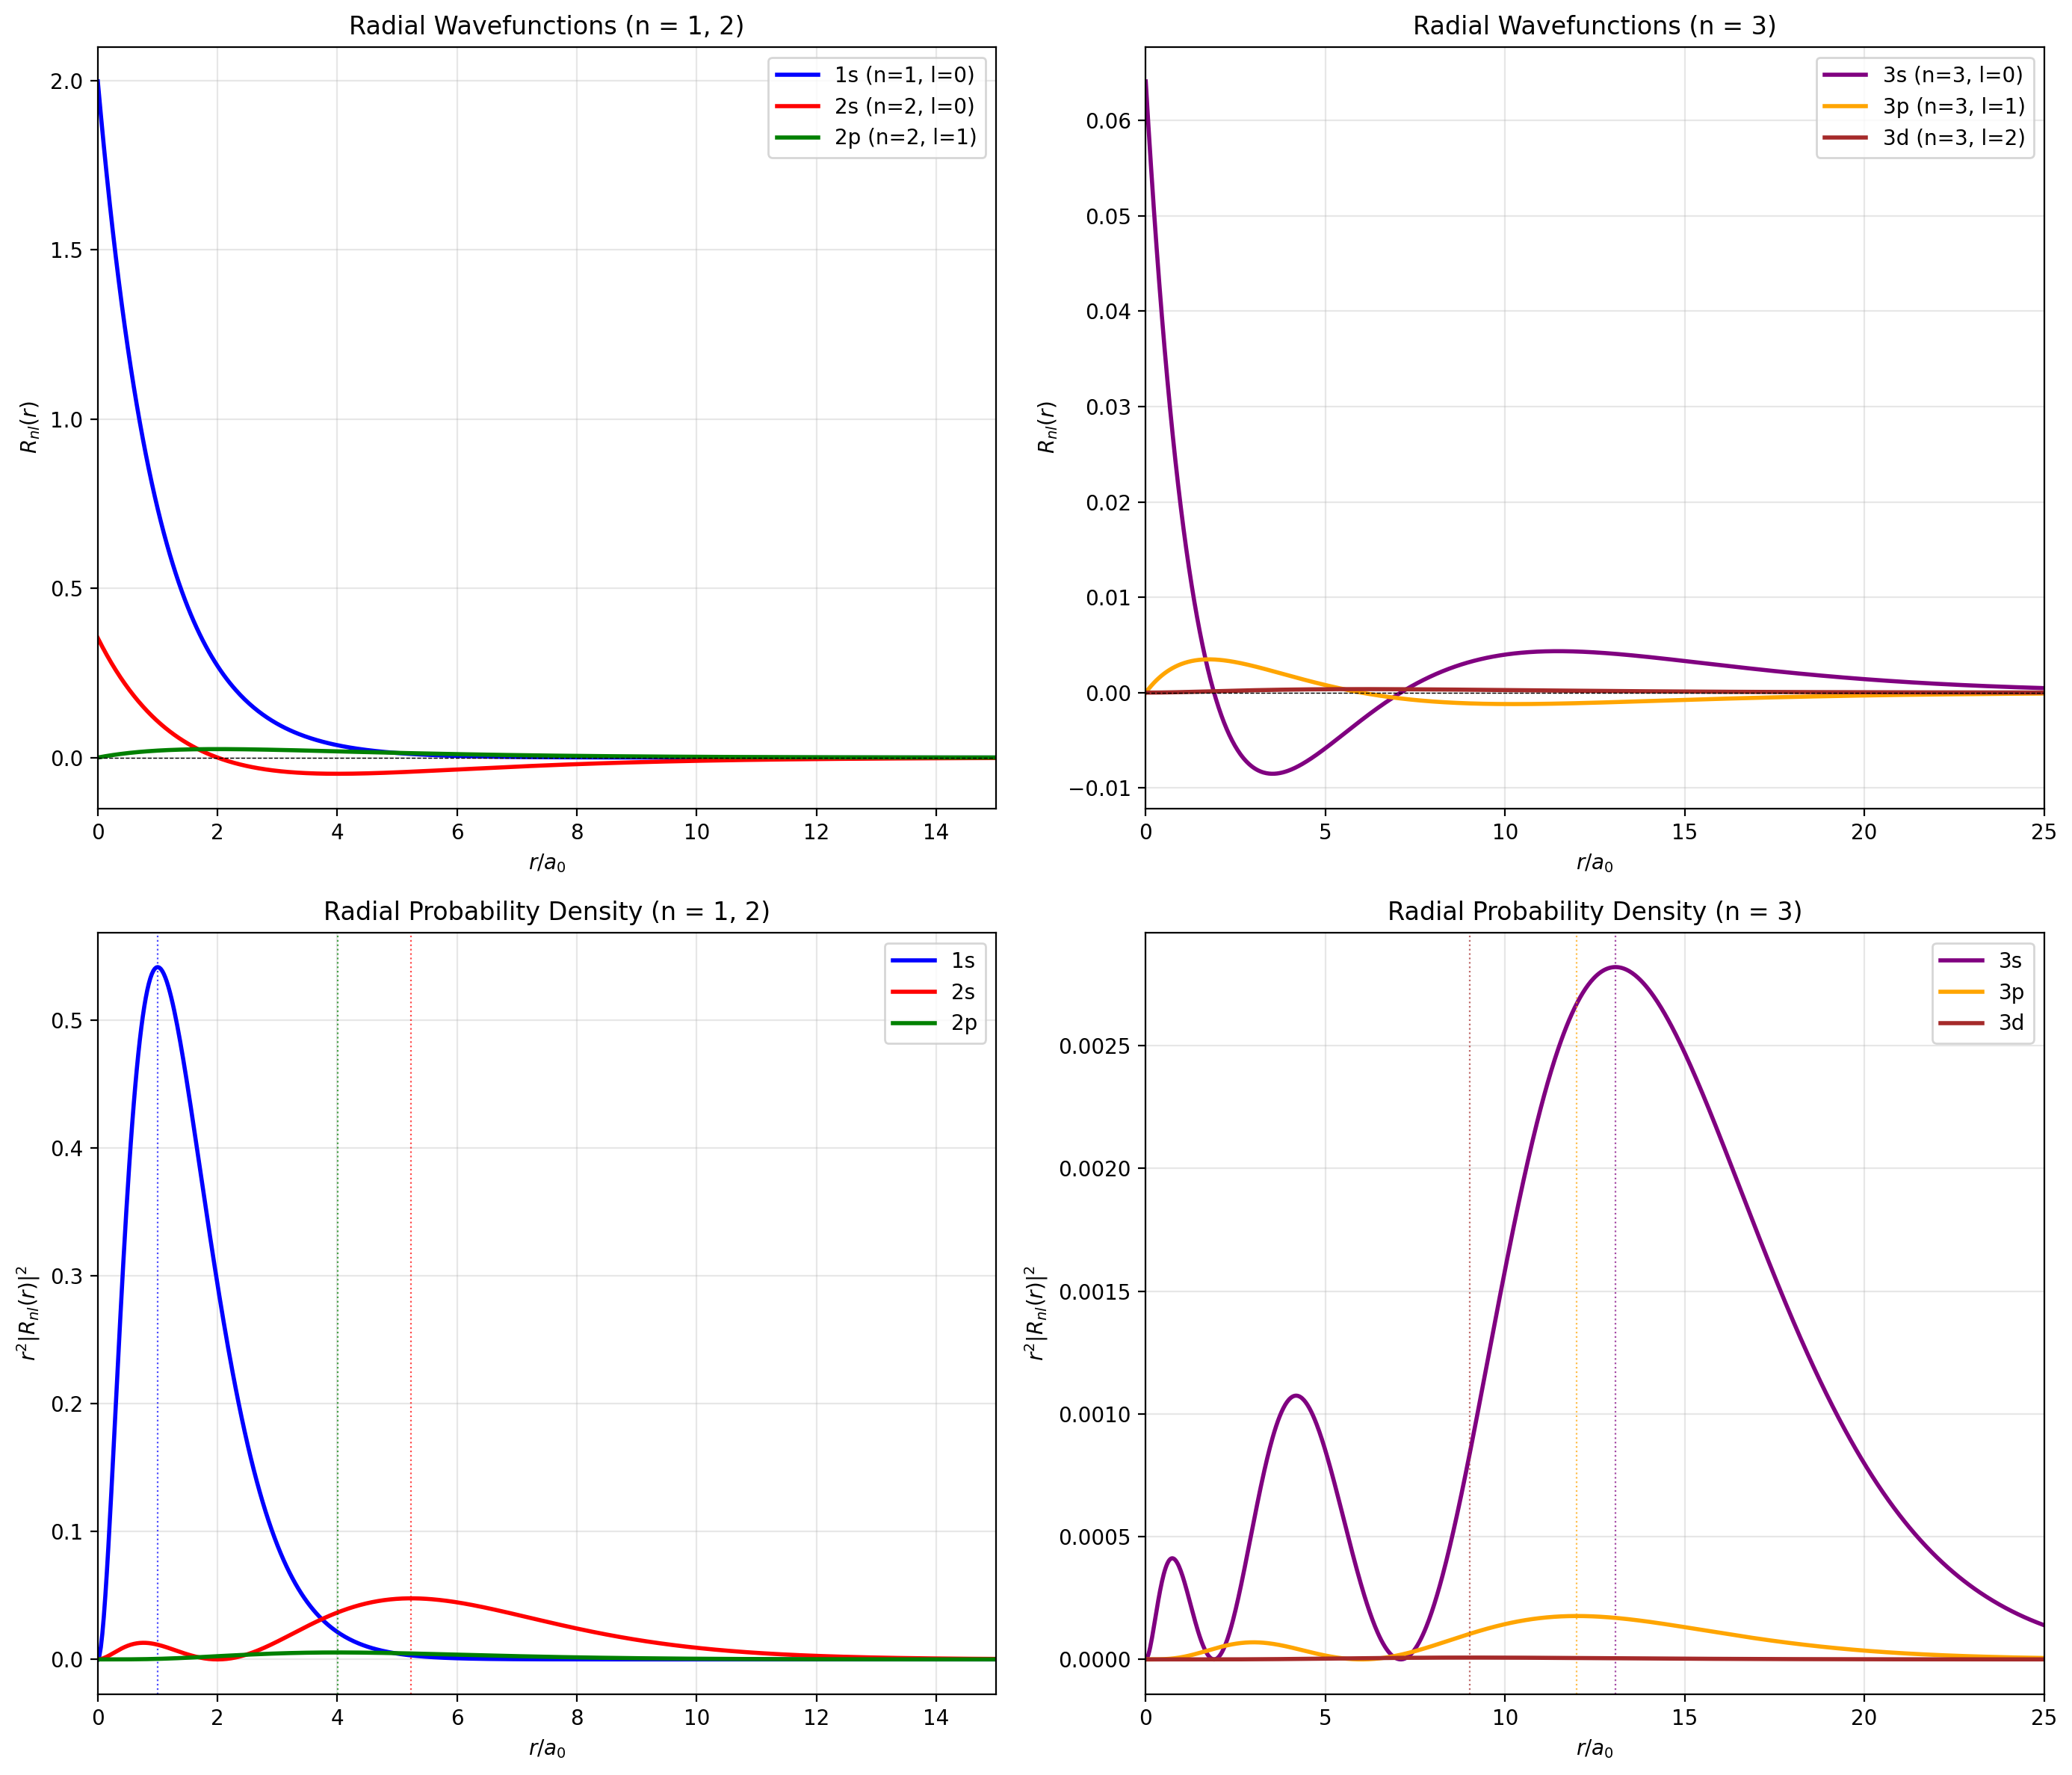

Plot saved to 'plot.png'


In [3]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Radial distance array
r = np.linspace(0.001, 25, 1000)

# Define states to plot: (n, l, label, color)
states = [
    (1, 0, '1s', 'blue'),
    (2, 0, '2s', 'red'),
    (2, 1, '2p', 'green'),
    (3, 0, '3s', 'purple'),
    (3, 1, '3p', 'orange'),
    (3, 2, '3d', 'brown'),
]

# Plot 1: Radial wavefunctions for n=1,2
ax1 = axes[0, 0]
for n, l, label, color in states[:3]:
    R = radial_wavefunction(r, n, l)
    ax1.plot(r, R, label=f'{label} (n={n}, l={l})', color=color, linewidth=2)

ax1.axhline(y=0, color='black', linewidth=0.5, linestyle='--')
ax1.set_xlabel(r'$r/a_0$')
ax1.set_ylabel(r'$R_{nl}(r)$')
ax1.set_title('Radial Wavefunctions (n = 1, 2)')
ax1.legend()
ax1.set_xlim(0, 15)
ax1.grid(True, alpha=0.3)

# Plot 2: Radial wavefunctions for n=3
ax2 = axes[0, 1]
for n, l, label, color in states[3:]:
    R = radial_wavefunction(r, n, l)
    ax2.plot(r, R, label=f'{label} (n={n}, l={l})', color=color, linewidth=2)

ax2.axhline(y=0, color='black', linewidth=0.5, linestyle='--')
ax2.set_xlabel(r'$r/a_0$')
ax2.set_ylabel(r'$R_{nl}(r)$')
ax2.set_title('Radial Wavefunctions (n = 3)')
ax2.legend()
ax2.set_xlim(0, 25)
ax2.grid(True, alpha=0.3)

# Plot 3: Radial probability densities for n=1,2
ax3 = axes[1, 0]
for n, l, label, color in states[:3]:
    P = radial_probability_density(r, n, l)
    ax3.plot(r, P, label=f'{label}', color=color, linewidth=2)
    
    # Mark the most probable radius
    r_max_idx = np.argmax(P)
    ax3.axvline(x=r[r_max_idx], color=color, linewidth=0.8, linestyle=':', alpha=0.7)

ax3.set_xlabel(r'$r/a_0$')
ax3.set_ylabel(r'$r^2|R_{nl}(r)|^2$')
ax3.set_title('Radial Probability Density (n = 1, 2)')
ax3.legend()
ax3.set_xlim(0, 15)
ax3.grid(True, alpha=0.3)

# Plot 4: Radial probability densities for n=3
ax4 = axes[1, 1]
for n, l, label, color in states[3:]:
    P = radial_probability_density(r, n, l)
    ax4.plot(r, P, label=f'{label}', color=color, linewidth=2)
    
    # Mark the most probable radius
    r_max_idx = np.argmax(P)
    ax4.axvline(x=r[r_max_idx], color=color, linewidth=0.8, linestyle=':', alpha=0.7)

ax4.set_xlabel(r'$r/a_0$')
ax4.set_ylabel(r'$r^2|R_{nl}(r)|^2$')
ax4.set_title('Radial Probability Density (n = 3)')
ax4.legend()
ax4.set_xlim(0, 25)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('hydrogen_atom_wavefunctions_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved to 'plot.png'")

## Analysis of Results

### Key Observations

1. **Number of radial nodes**: The radial wavefunction $R_{nl}(r)$ has $n - l - 1$ nodes (zeros). For example:
   - 1s: 0 nodes
   - 2s: 1 node
   - 2p: 0 nodes
   - 3s: 2 nodes

2. **Behavior at origin**: $R_{nl}(0) \neq 0$ only for $l = 0$ (s orbitals). For $l > 0$, the wavefunction vanishes at the origin due to the centrifugal barrier.

3. **Most probable radius**: The peak of $r^2|R_{nl}|^2$ gives the most probable distance from the nucleus. For the 1s state, this occurs at $r = a_0$.

4. **Spatial extent**: Higher $n$ states extend further from the nucleus, consistent with larger orbital sizes.

In [4]:
# Calculate and display key properties
print("Hydrogen Atom Orbital Properties")
print("=" * 50)
print(f"{'State':<8} {'Nodes':<8} {'r_max/a0':<12} {'<r>/a0':<12}")
print("-" * 50)

for n, l, label, color in states:
    # Number of radial nodes
    nodes = n - l - 1
    
    # Most probable radius
    P = radial_probability_density(r, n, l)
    r_max = r[np.argmax(P)]
    
    # Expectation value <r>
    # Analytical result: <r> = (a0/2) * [3n^2 - l(l+1)]
    r_expect = (a0 / 2) * (3 * n**2 - l * (l + 1))
    
    print(f"{label:<8} {nodes:<8} {r_max:<12.3f} {r_expect:<12.3f}")

print("\nNote: r_max is the most probable radius (peak of radial probability density)")
print("      <r> is the expectation value of r")

Hydrogen Atom Orbital Properties
State    Nodes    r_max/a0     <r>/a0      
--------------------------------------------------
1s       0        1.002        1.500       
2s       1        5.231        6.000       
2p       0        4.005        5.000       
3s       2        13.064       13.500      
3p       1        11.988       12.500      
3d       0        9.010        10.500      

Note: r_max is the most probable radius (peak of radial probability density)
      <r> is the expectation value of r


## Angular Wavefunctions: Spherical Harmonics

The angular part of the wavefunction is described by the spherical harmonics $Y_l^m(\theta, \phi)$. These determine the shape of the electron cloud (s, p, d orbitals, etc.).

The spherical harmonics are eigenfunctions of both $\hat{L}^2$ and $\hat{L}_z$:

$$\hat{L}^2 Y_l^m = \hbar^2 l(l+1) Y_l^m$$
$$\hat{L}_z Y_l^m = \hbar m Y_l^m$$

In [5]:
def hydrogen_wavefunction_3d(r, theta, phi, n, l, m):
    """
    Calculate the full hydrogen wavefunction psi_nlm(r, theta, phi).
    
    Returns the probability density |psi|^2.
    """
    R = radial_wavefunction(r, n, l)
    Y = sph_harm(m, l, phi, theta)  # Note: scipy uses (m, l, phi, theta) convention
    psi = R * Y
    return np.abs(psi)**2


# Visualize probability density in a cross-section (xz plane)
def plot_orbital_cross_section(n, l, m, ax, title):
    """
    Plot the probability density in the xz plane.
    """
    # Grid in Cartesian coordinates
    x = np.linspace(-20, 20, 200)
    z = np.linspace(-20, 20, 200)
    X, Z = np.meshgrid(x, z)
    Y_coord = np.zeros_like(X)  # y = 0 plane
    
    # Convert to spherical coordinates
    R = np.sqrt(X**2 + Y_coord**2 + Z**2)
    R = np.where(R == 0, 1e-10, R)  # Avoid division by zero
    THETA = np.arccos(Z / R)
    PHI = np.arctan2(Y_coord, X)
    
    # Calculate probability density
    prob_density = hydrogen_wavefunction_3d(R, THETA, PHI, n, l, m)
    
    # Plot
    im = ax.contourf(X, Z, prob_density, levels=50, cmap='hot')
    ax.set_xlabel(r'$x/a_0$')
    ax.set_ylabel(r'$z/a_0$')
    ax.set_title(title)
    ax.set_aspect('equal')
    
    return im

/tmp/ipykernel_156161/1446975312.py:8: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Y = sph_harm(m, l, phi, theta)  # Note: scipy uses (m, l, phi, theta) convention


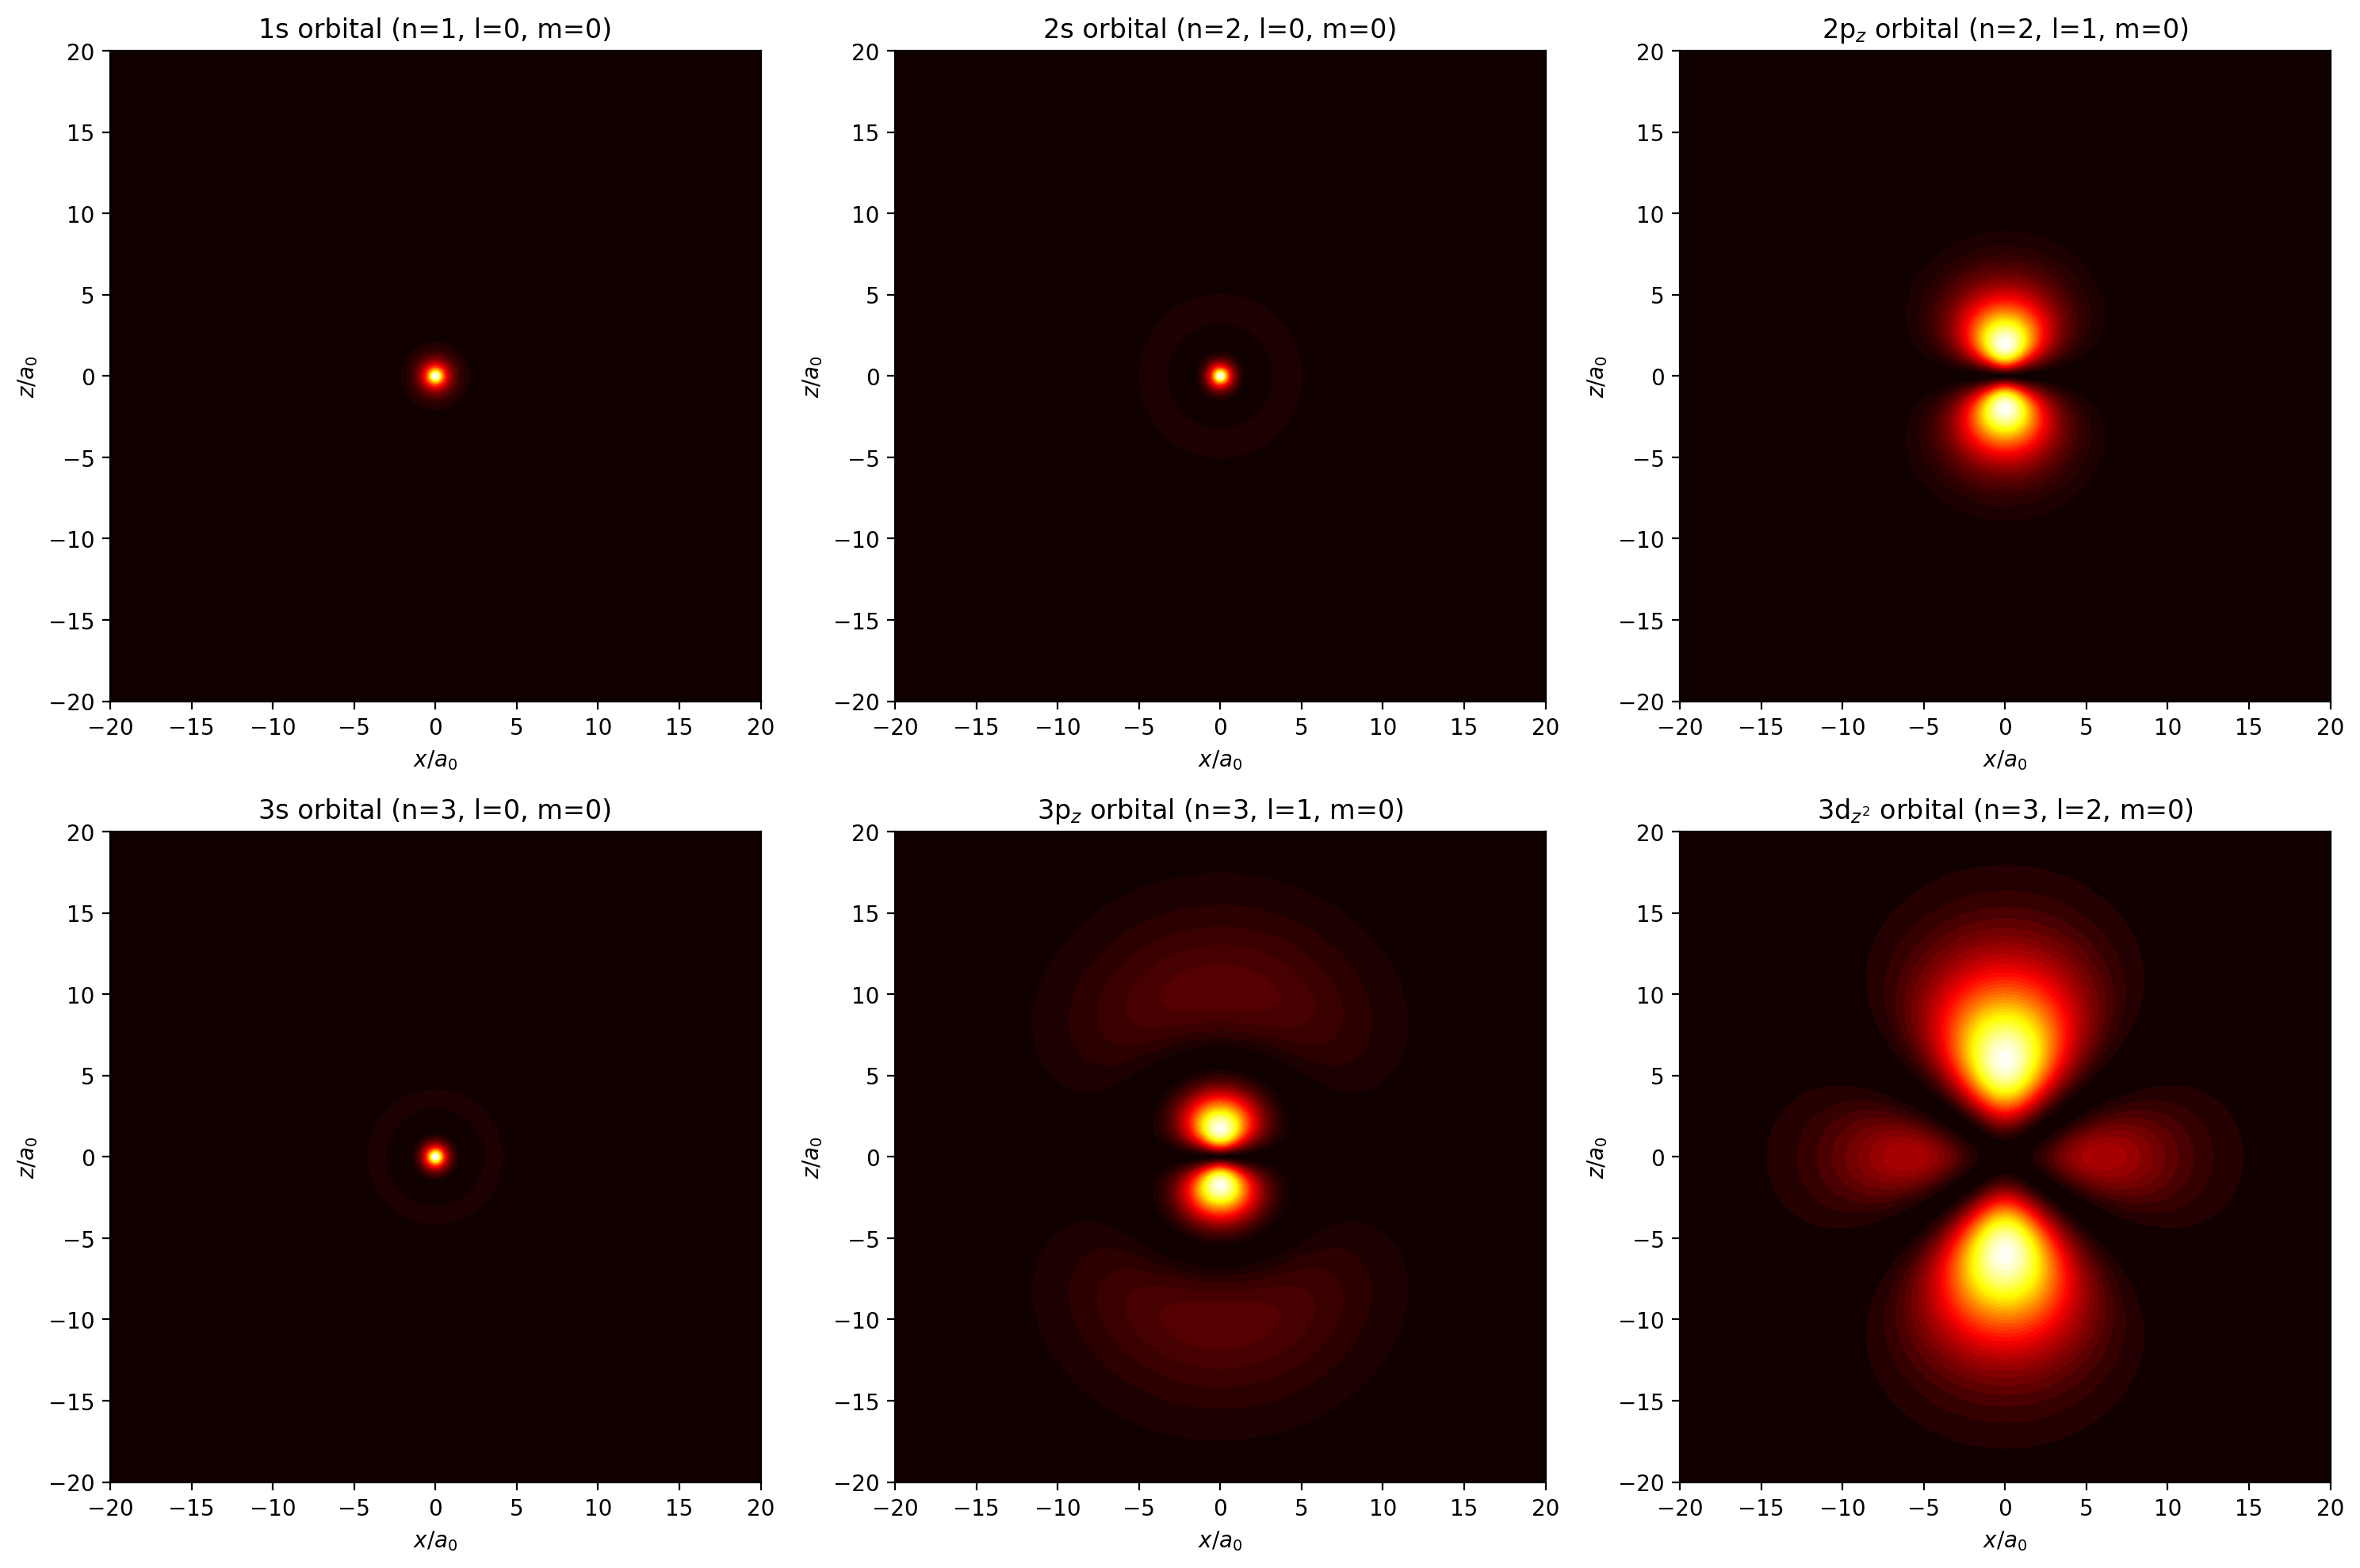

In [6]:
# Create visualization of different orbitals
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

orbitals = [
    (1, 0, 0, '1s'),
    (2, 0, 0, '2s'),
    (2, 1, 0, r'2p$_z$'),
    (3, 0, 0, '3s'),
    (3, 1, 0, r'3p$_z$'),
    (3, 2, 0, r'3d$_{z^2}$'),
]

for ax, (n, l, m, label) in zip(axes.flatten(), orbitals):
    plot_orbital_cross_section(n, l, m, ax, f'{label} orbital (n={n}, l={l}, m={m})')

plt.tight_layout()
plt.show()

## Energy Level Diagram

The energy levels of the hydrogen atom follow the formula:

$$E_n = -\frac{13.6 \text{ eV}}{n^2}$$

This degeneracy (all states with same $n$ have same energy) is unique to the Coulomb potential and is lifted by relativistic corrections and other perturbations.

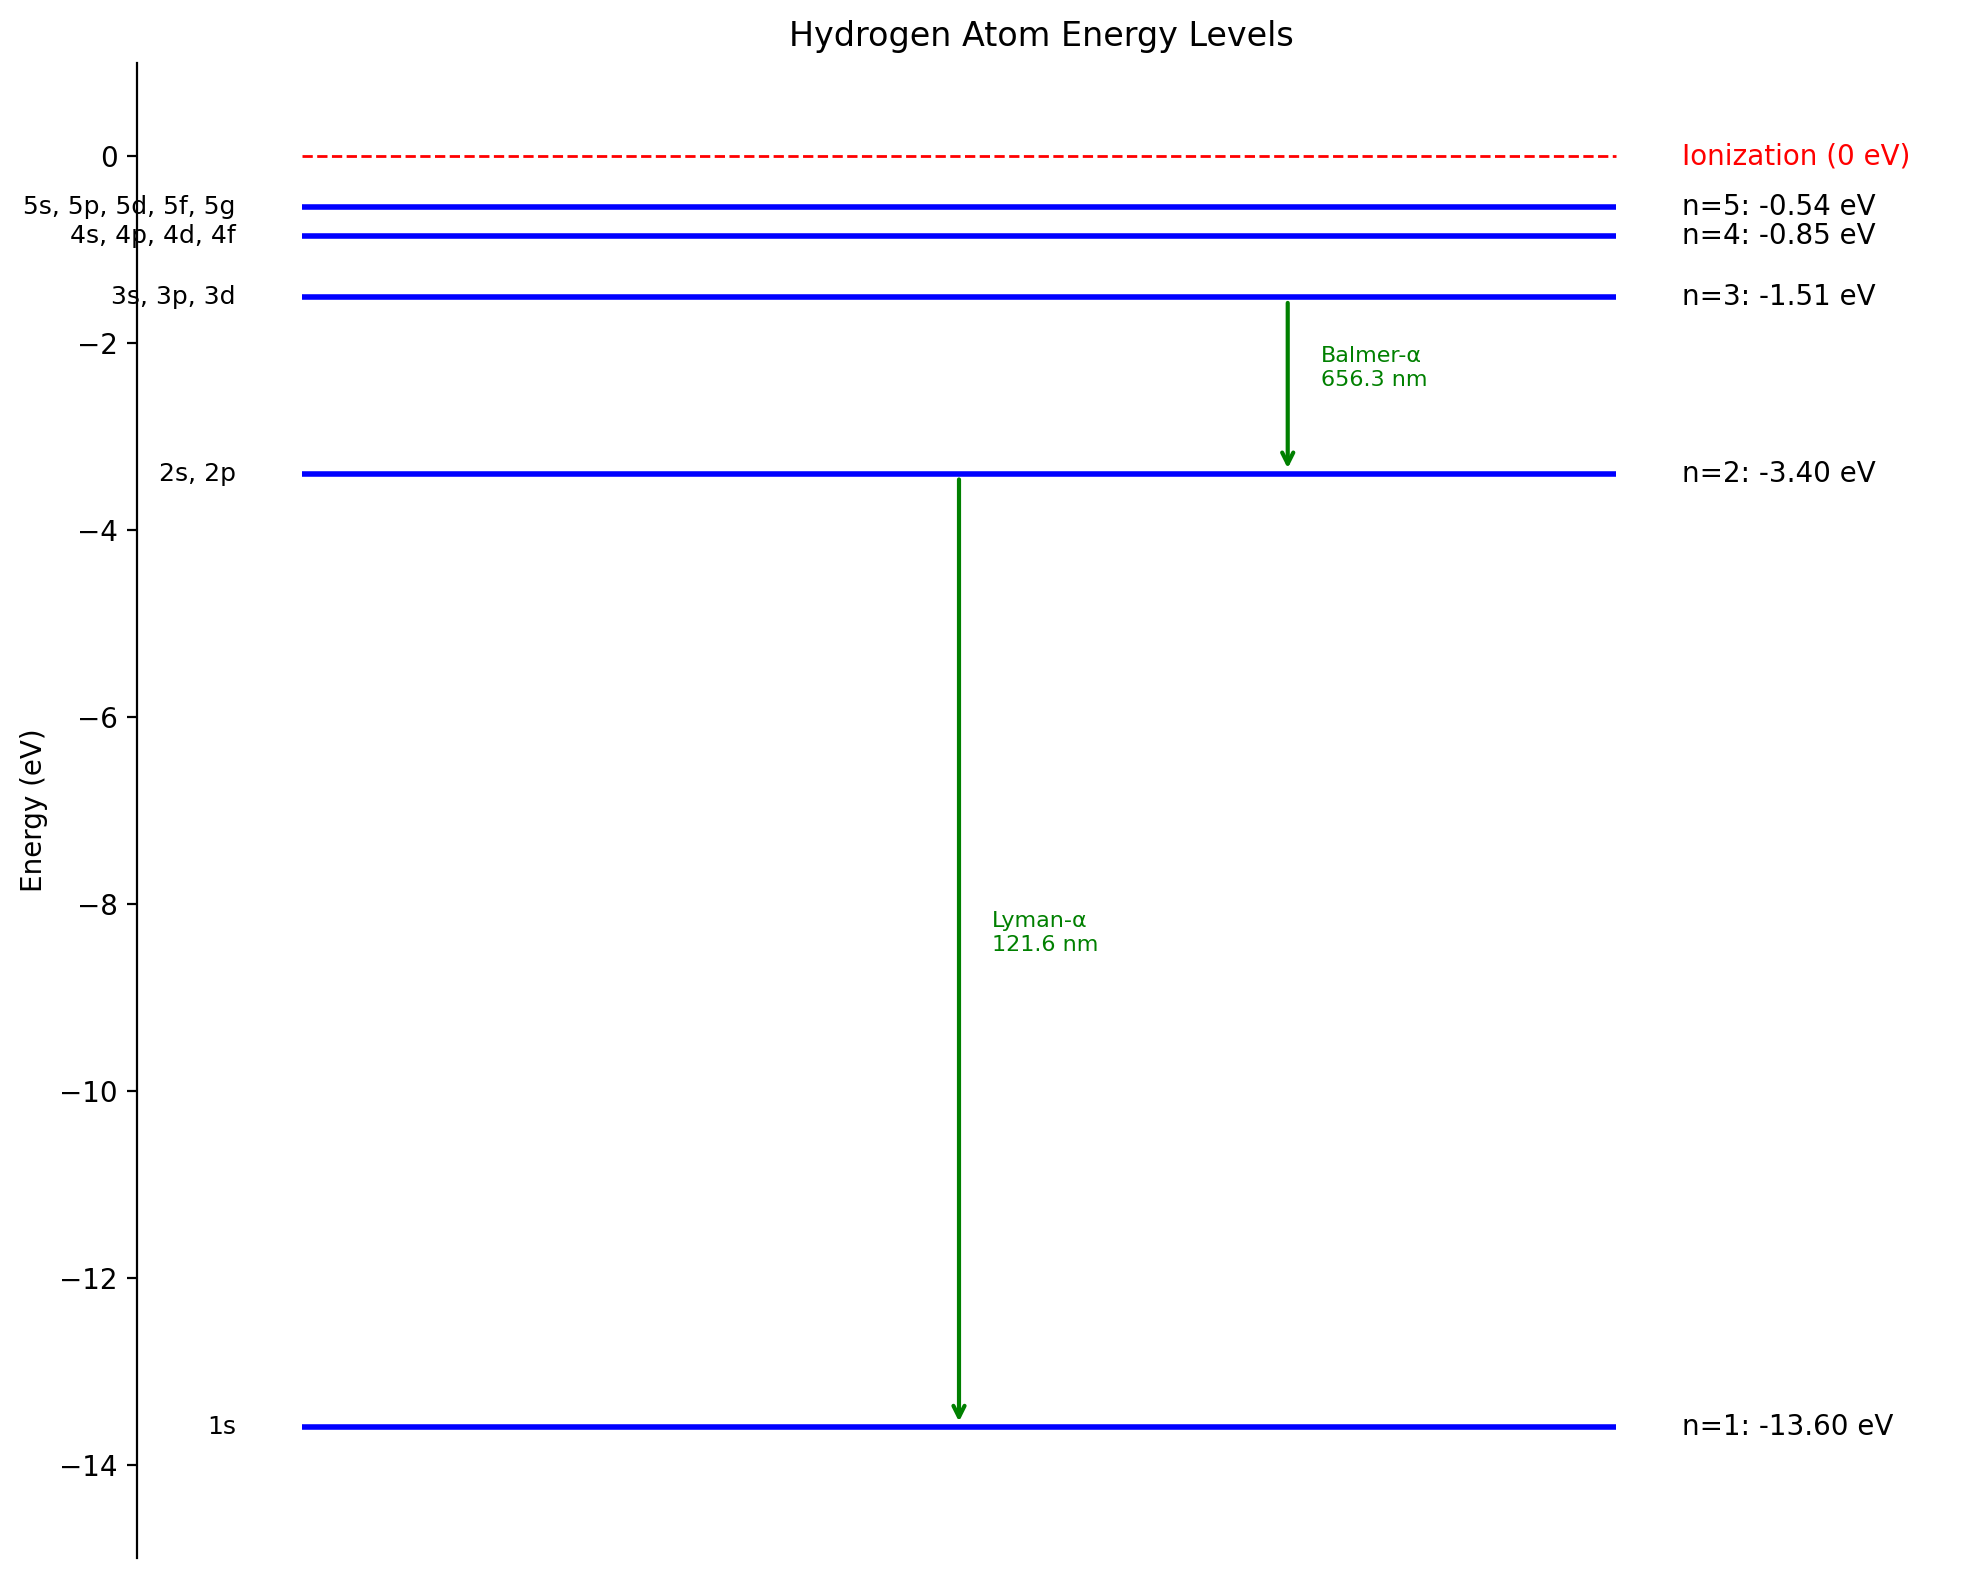

In [7]:
# Energy level diagram
fig, ax = plt.subplots(figsize=(10, 8))

# Energy levels
n_values = [1, 2, 3, 4, 5]
energies = [-13.6 / n**2 for n in n_values]

# Plot energy levels
for n, E in zip(n_values, energies):
    # Determine subshells for this n
    subshells = []
    for l in range(n):
        subshell_names = ['s', 'p', 'd', 'f', 'g']
        subshells.append(f"{n}{subshell_names[l]}")
    
    # Plot the energy level
    ax.hlines(E, 0.5, 4.5, colors='blue', linewidth=2)
    ax.text(4.7, E, f'n={n}: {E:.2f} eV', va='center', fontsize=10)
    ax.text(0.3, E, ', '.join(subshells), va='center', ha='right', fontsize=9)

# Add ionization limit
ax.hlines(0, 0.5, 4.5, colors='red', linewidth=1, linestyles='dashed')
ax.text(4.7, 0, 'Ionization (0 eV)', va='center', fontsize=10, color='red')

# Add some transition arrows
transitions = [
    (2, 1, 'Lyman-α\n121.6 nm'),
    (3, 2, 'Balmer-α\n656.3 nm'),
]

for n_upper, n_lower, label in transitions:
    E_upper = -13.6 / n_upper**2
    E_lower = -13.6 / n_lower**2
    x_pos = 2.5 if n_lower == 1 else 3.5
    ax.annotate('', xy=(x_pos, E_lower), xytext=(x_pos, E_upper),
                arrowprops=dict(arrowstyle='->', color='green', lw=1.5))
    ax.text(x_pos + 0.1, (E_upper + E_lower) / 2, label, fontsize=8, color='green')

ax.set_xlim(0, 5.5)
ax.set_ylim(-15, 1)
ax.set_ylabel('Energy (eV)')
ax.set_title('Hydrogen Atom Energy Levels')
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()

## Conclusions

This notebook has demonstrated:

1. The mathematical structure of hydrogen atom wavefunctions $\psi_{nlm}(r, \theta, \phi) = R_{nl}(r) Y_l^m(\theta, \phi)$

2. Implementation of radial wavefunctions using associated Laguerre polynomials

3. Visualization of radial probability densities showing the characteristic node structure

4. The relationship between quantum numbers and orbital properties:
   - $n$ determines the energy and overall size
   - $l$ determines the angular momentum and shape
   - $m$ determines the orientation in space

5. The energy level structure leading to atomic spectra

The hydrogen atom serves as the foundation for understanding more complex atoms through the central field approximation and perturbation theory.